In [1]:
!nvidia-smi

Sat Jan 27 11:55:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
os.chdir("/content/drive/MyDrive/dental_data")
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/dental_data


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!yolo task=segment mode=train model=yolov8l-seg.pt data='data.yaml' epochs=10 imgsz=640

100% 88.1M/88.1M [00:00<00:00, 163MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

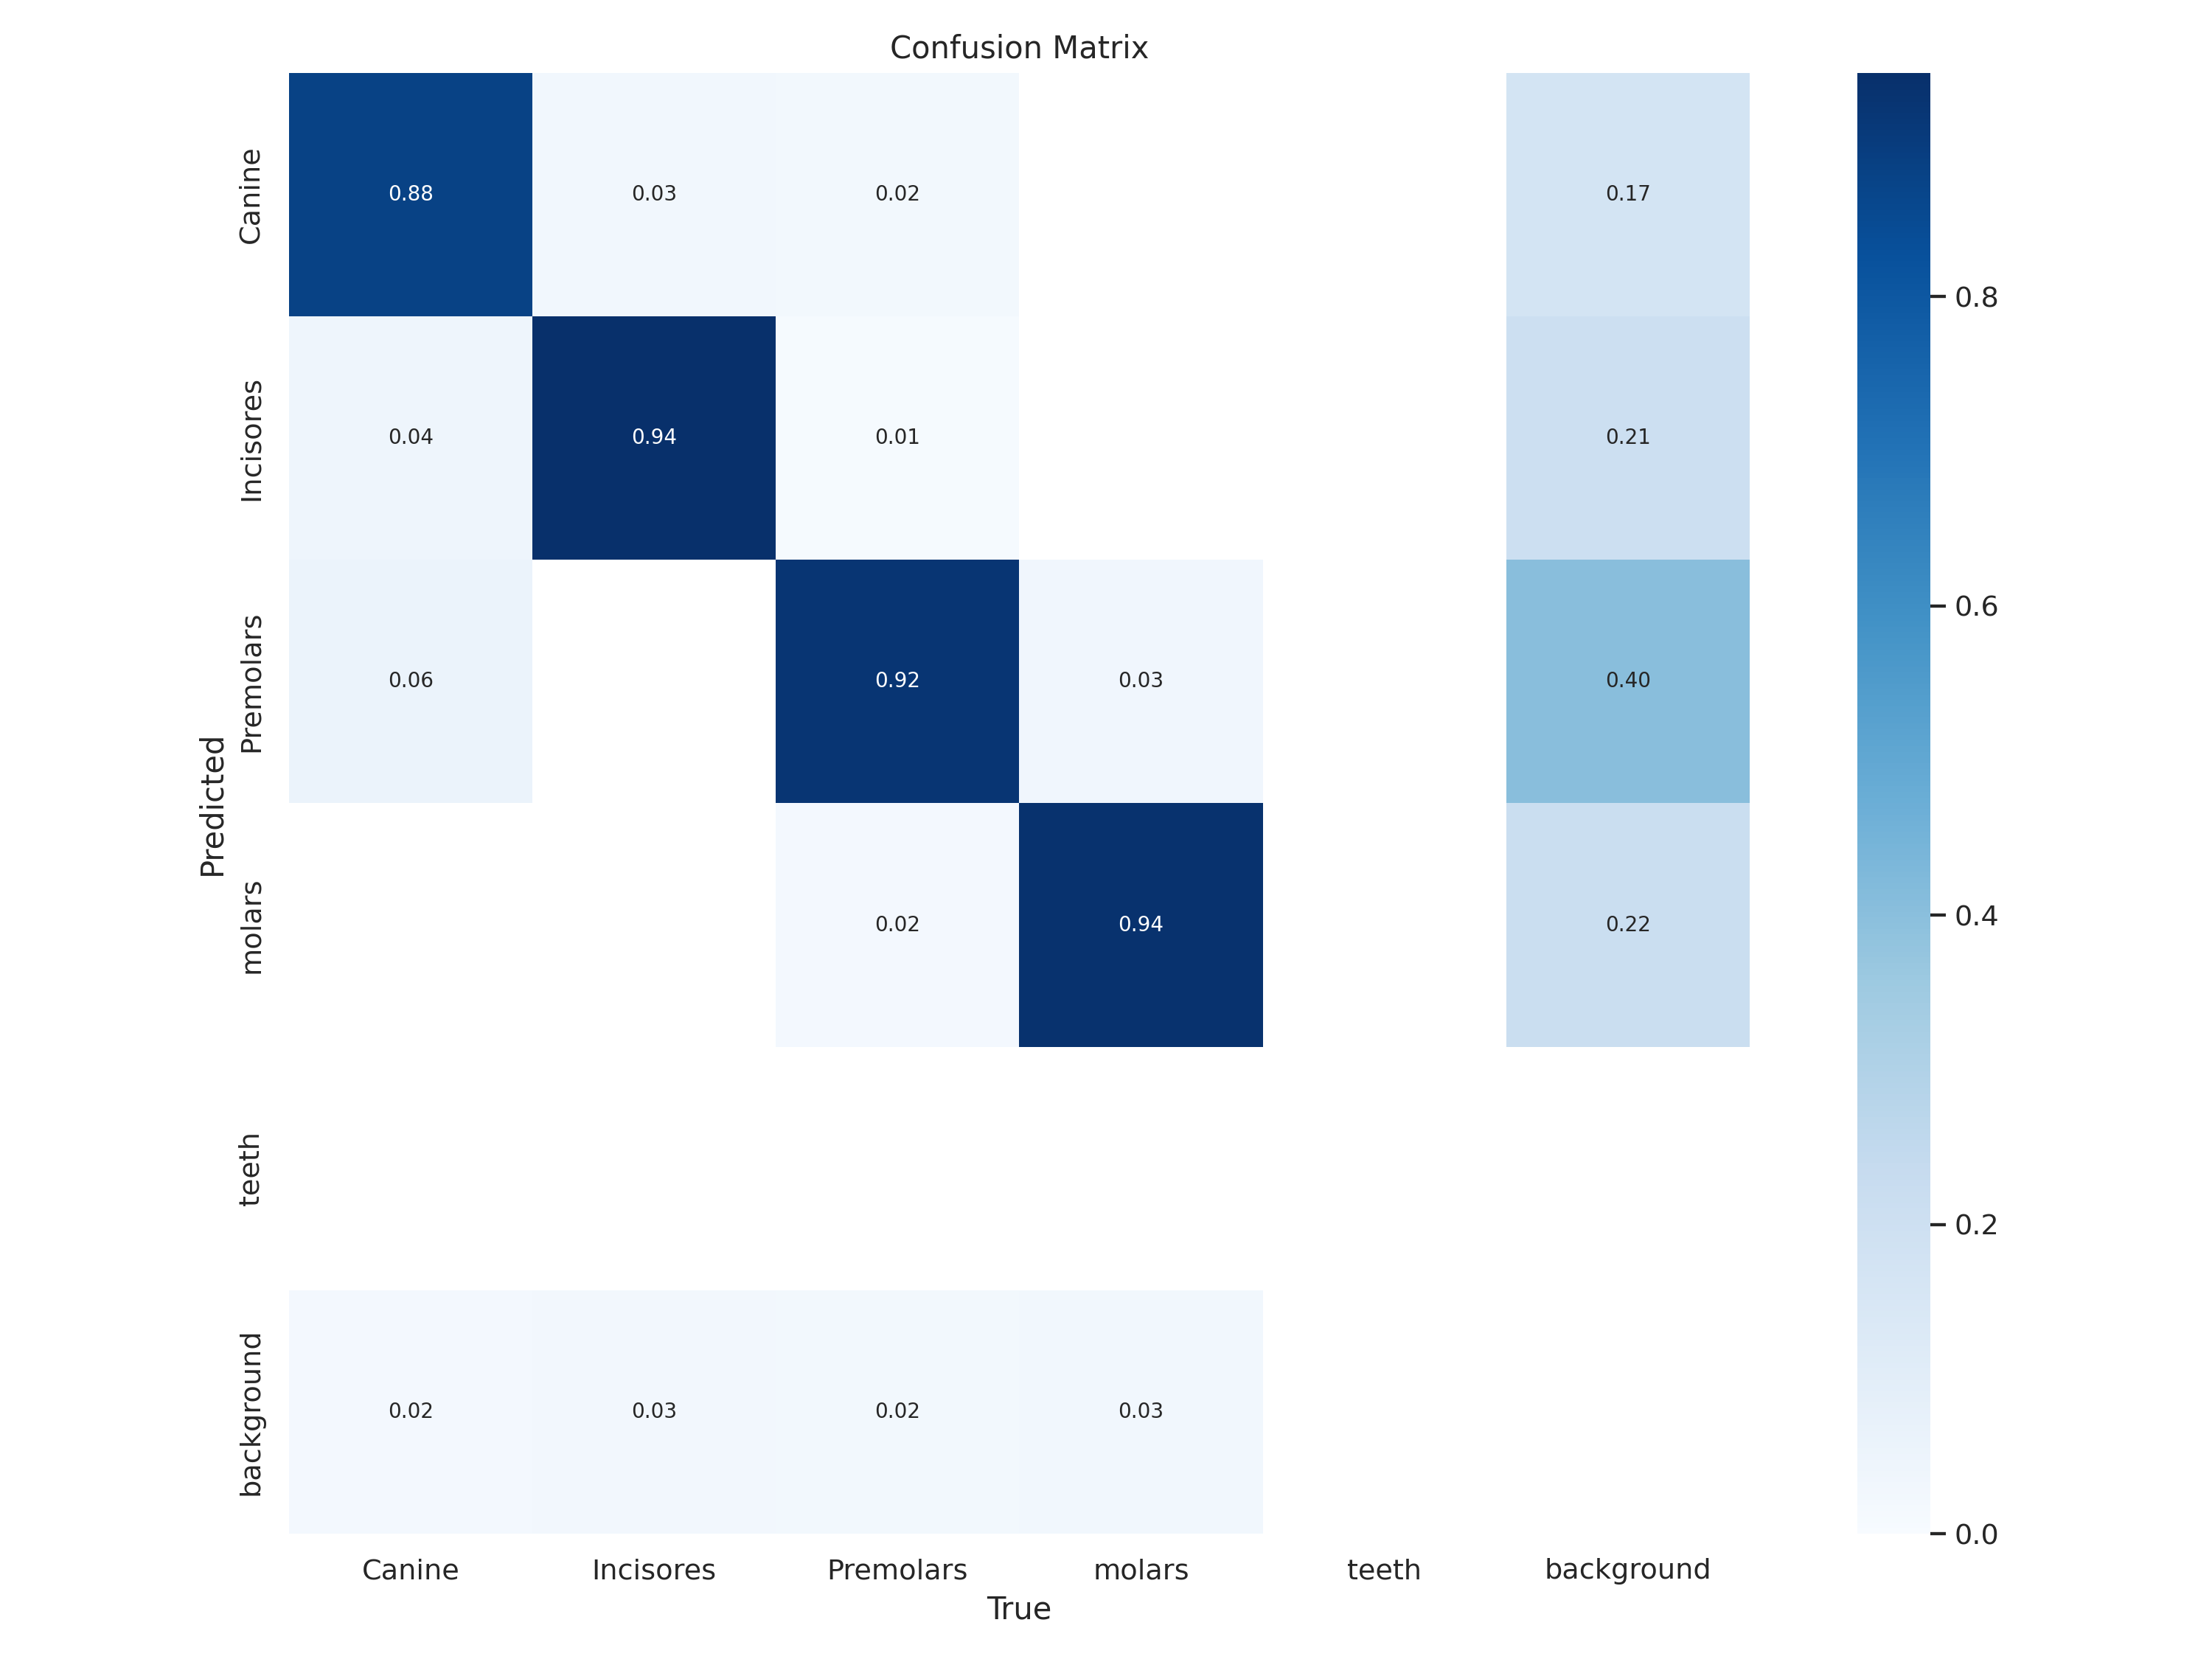

In [6]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png')

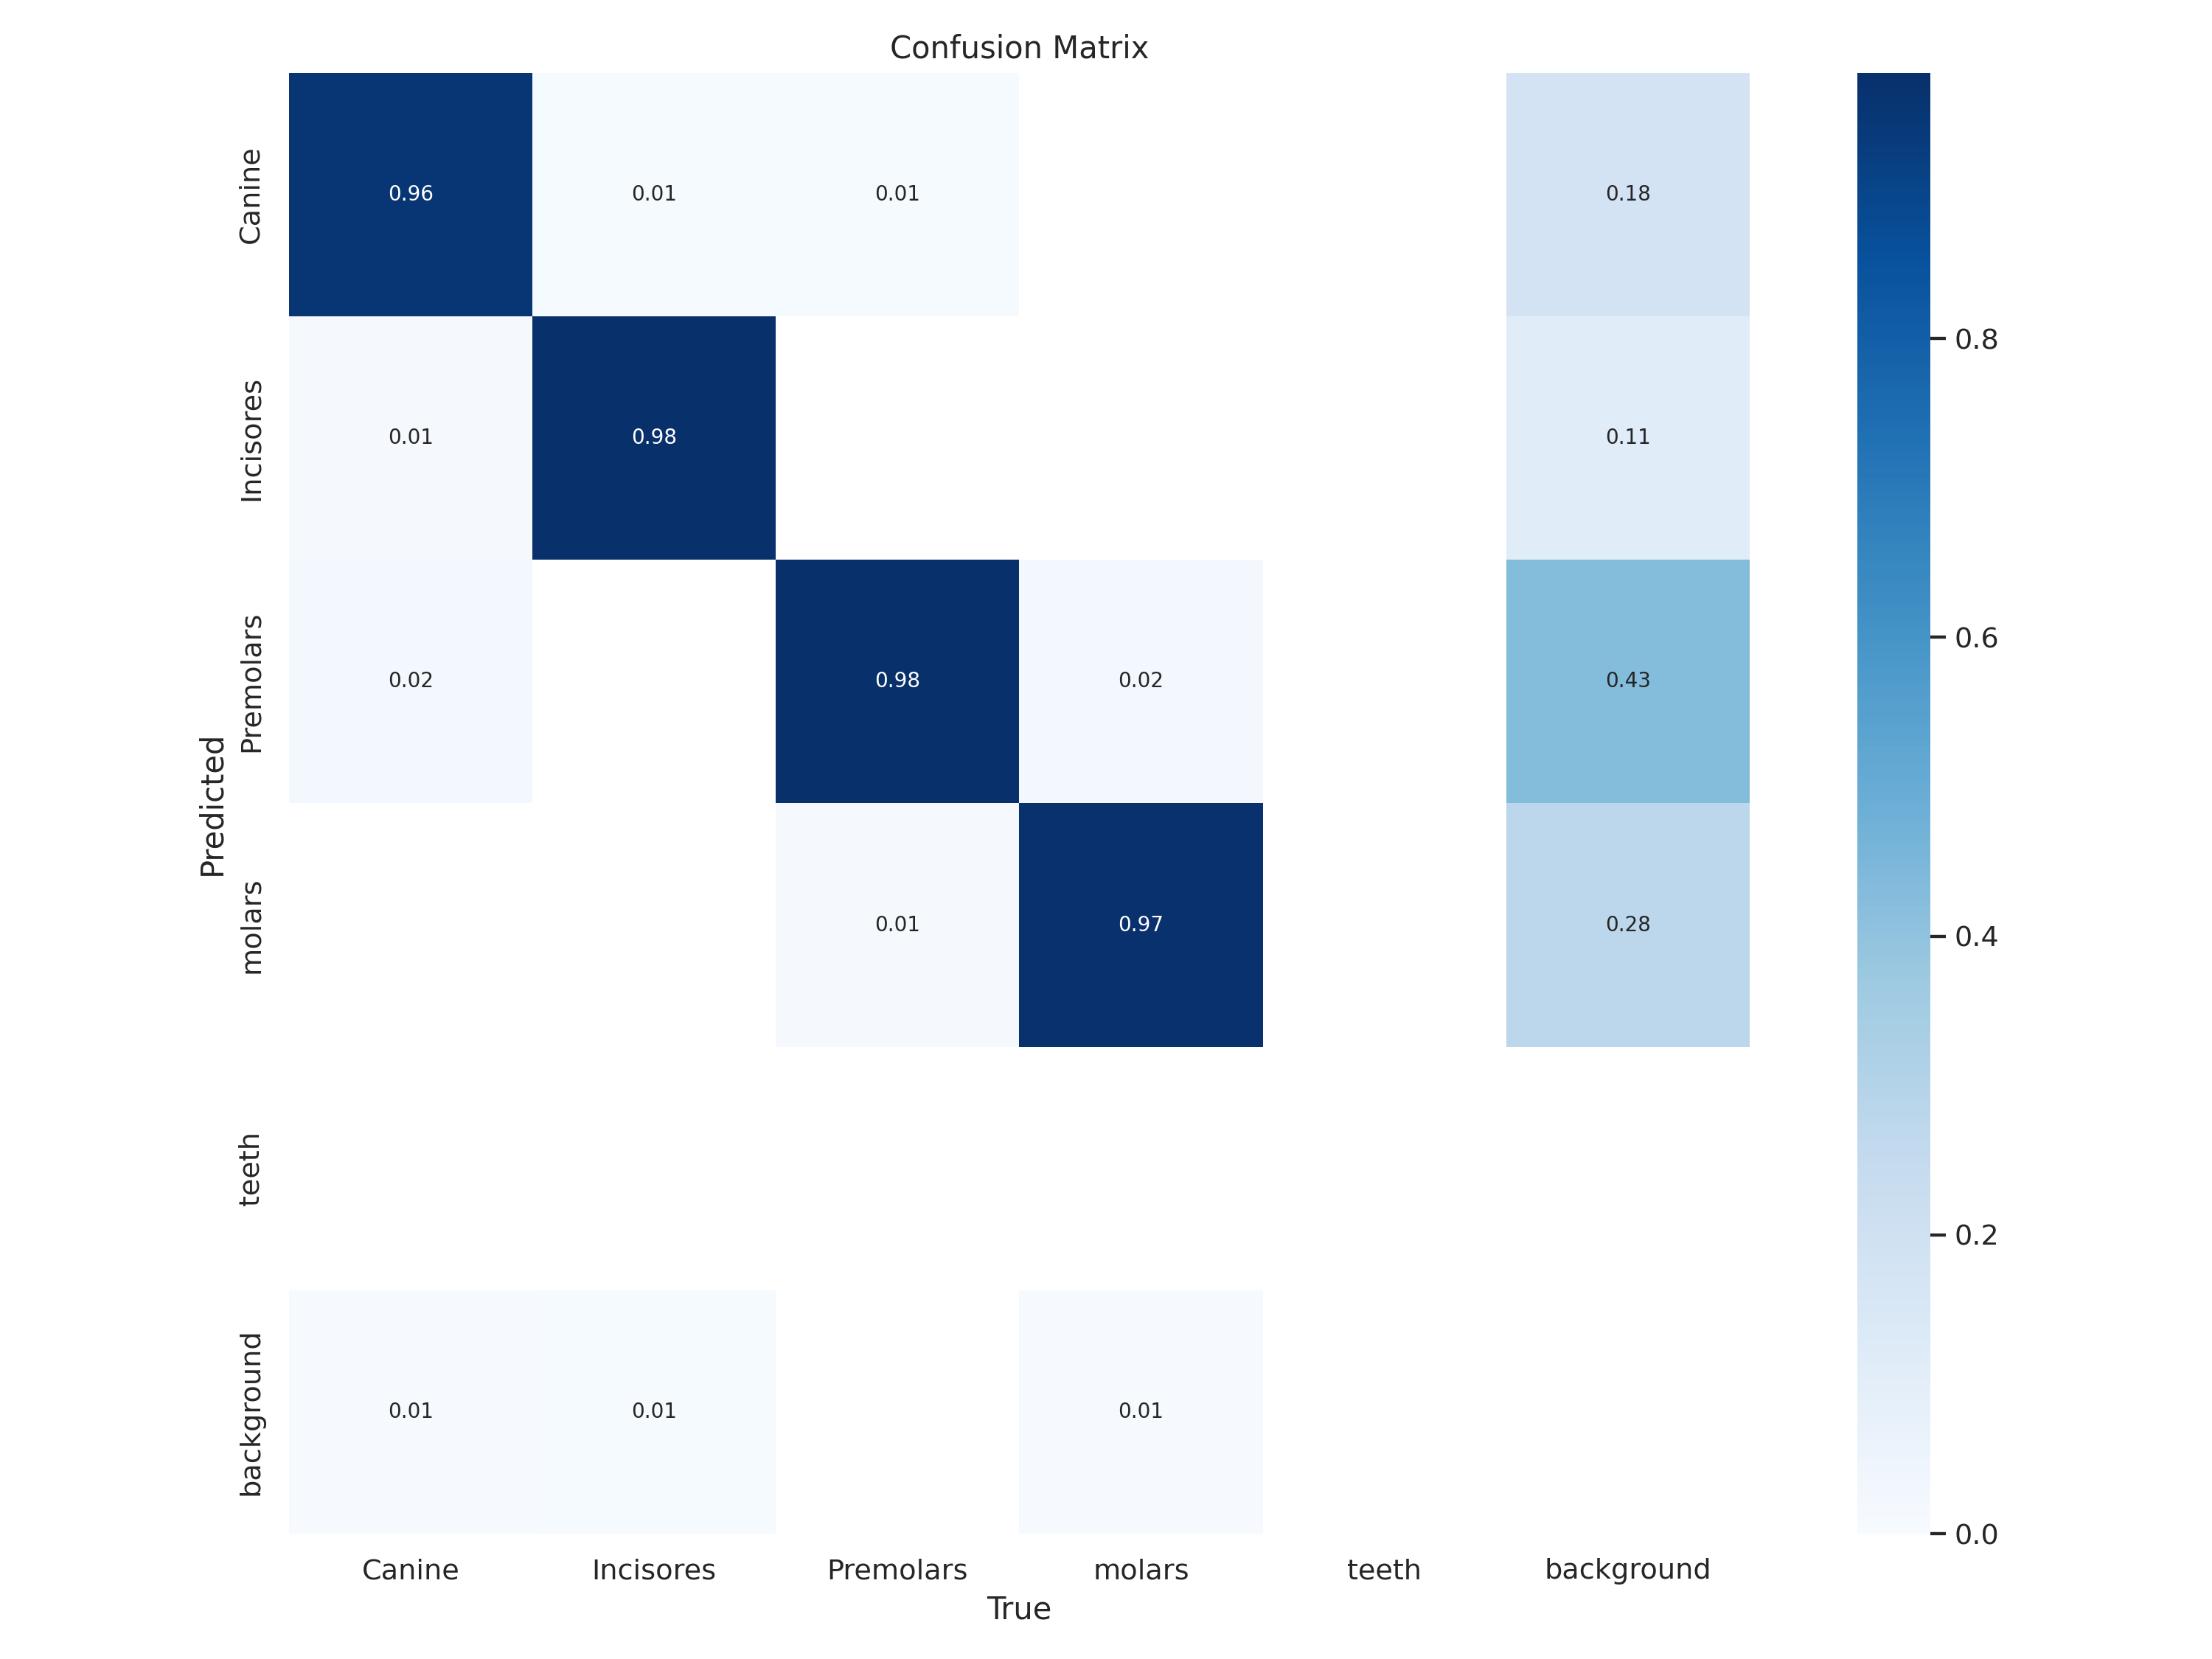

In [ ]:
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png')

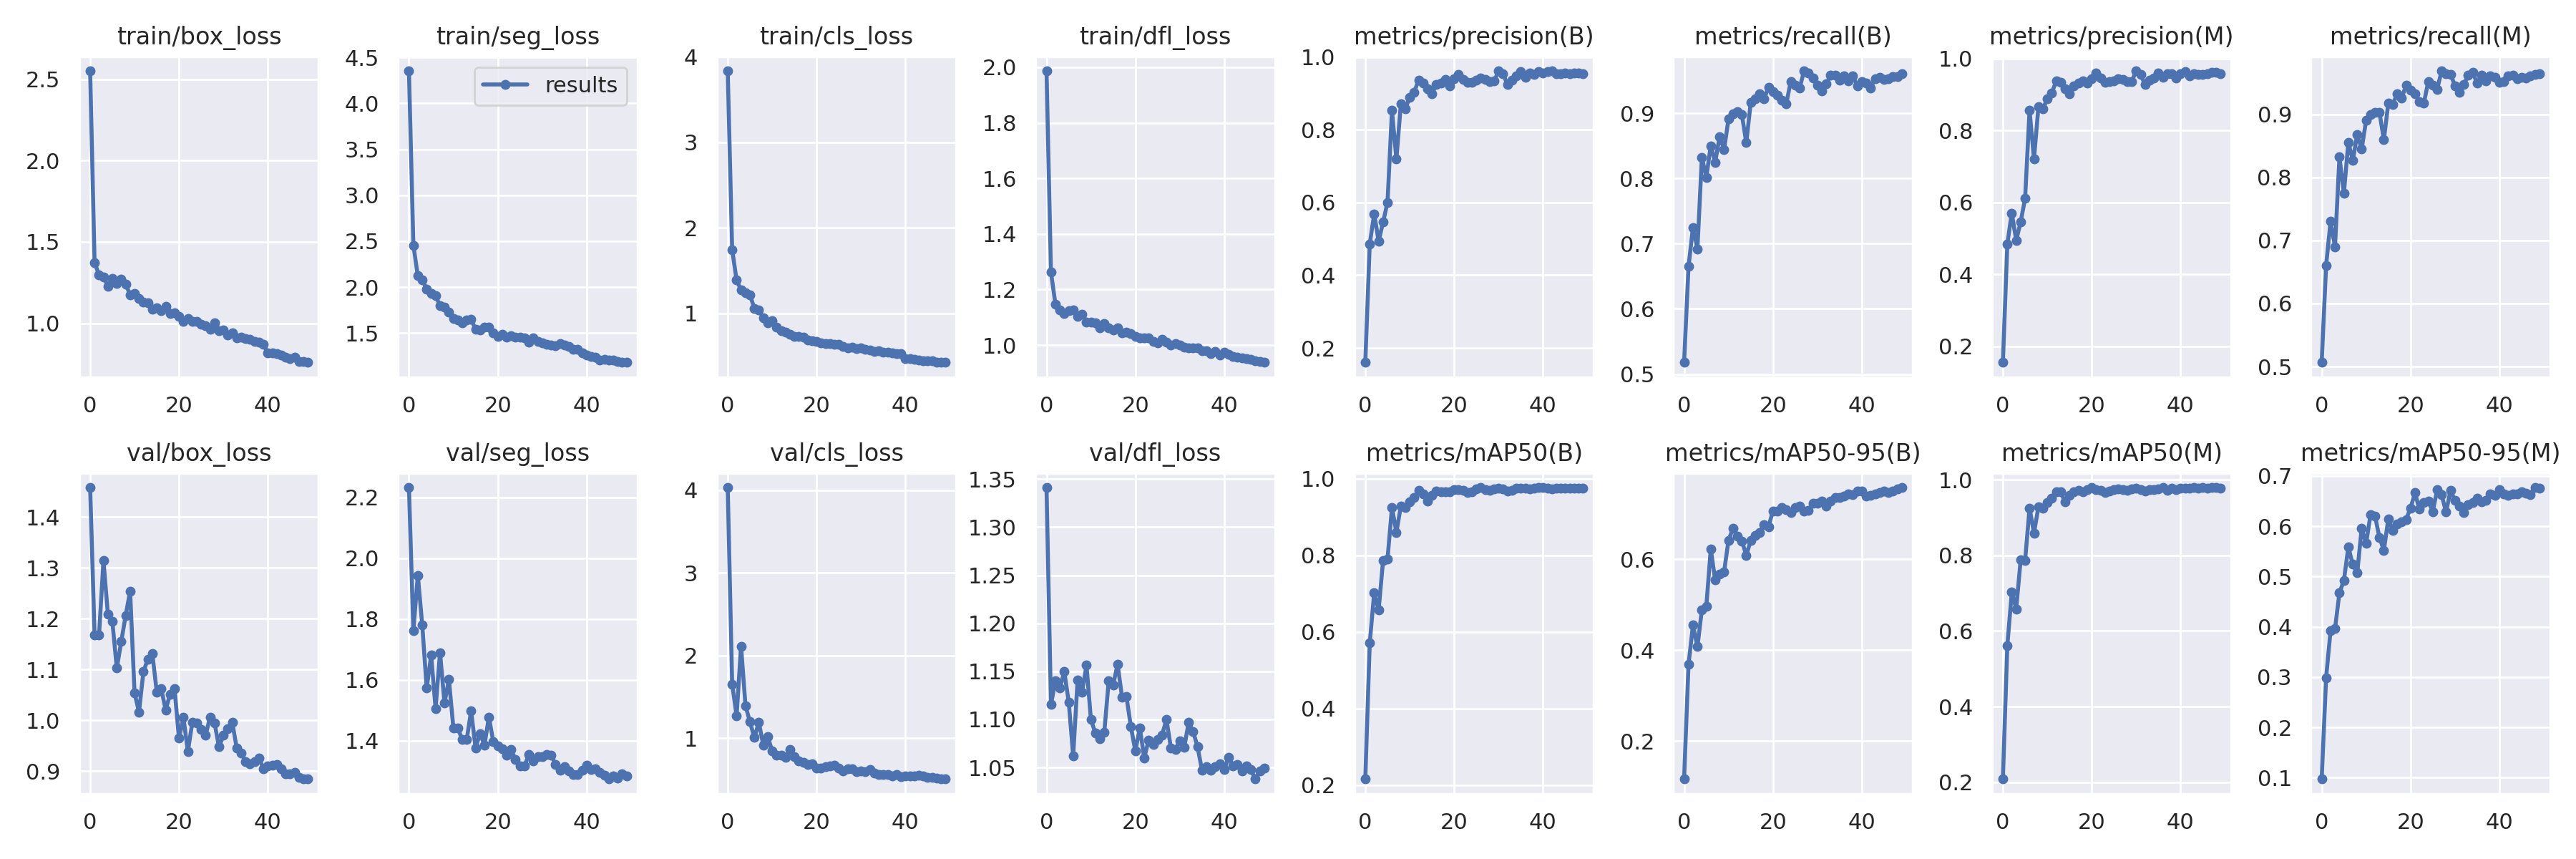

In [ ]:
Image(filename=f'{HOME}/runs/segment/train2/results.png')

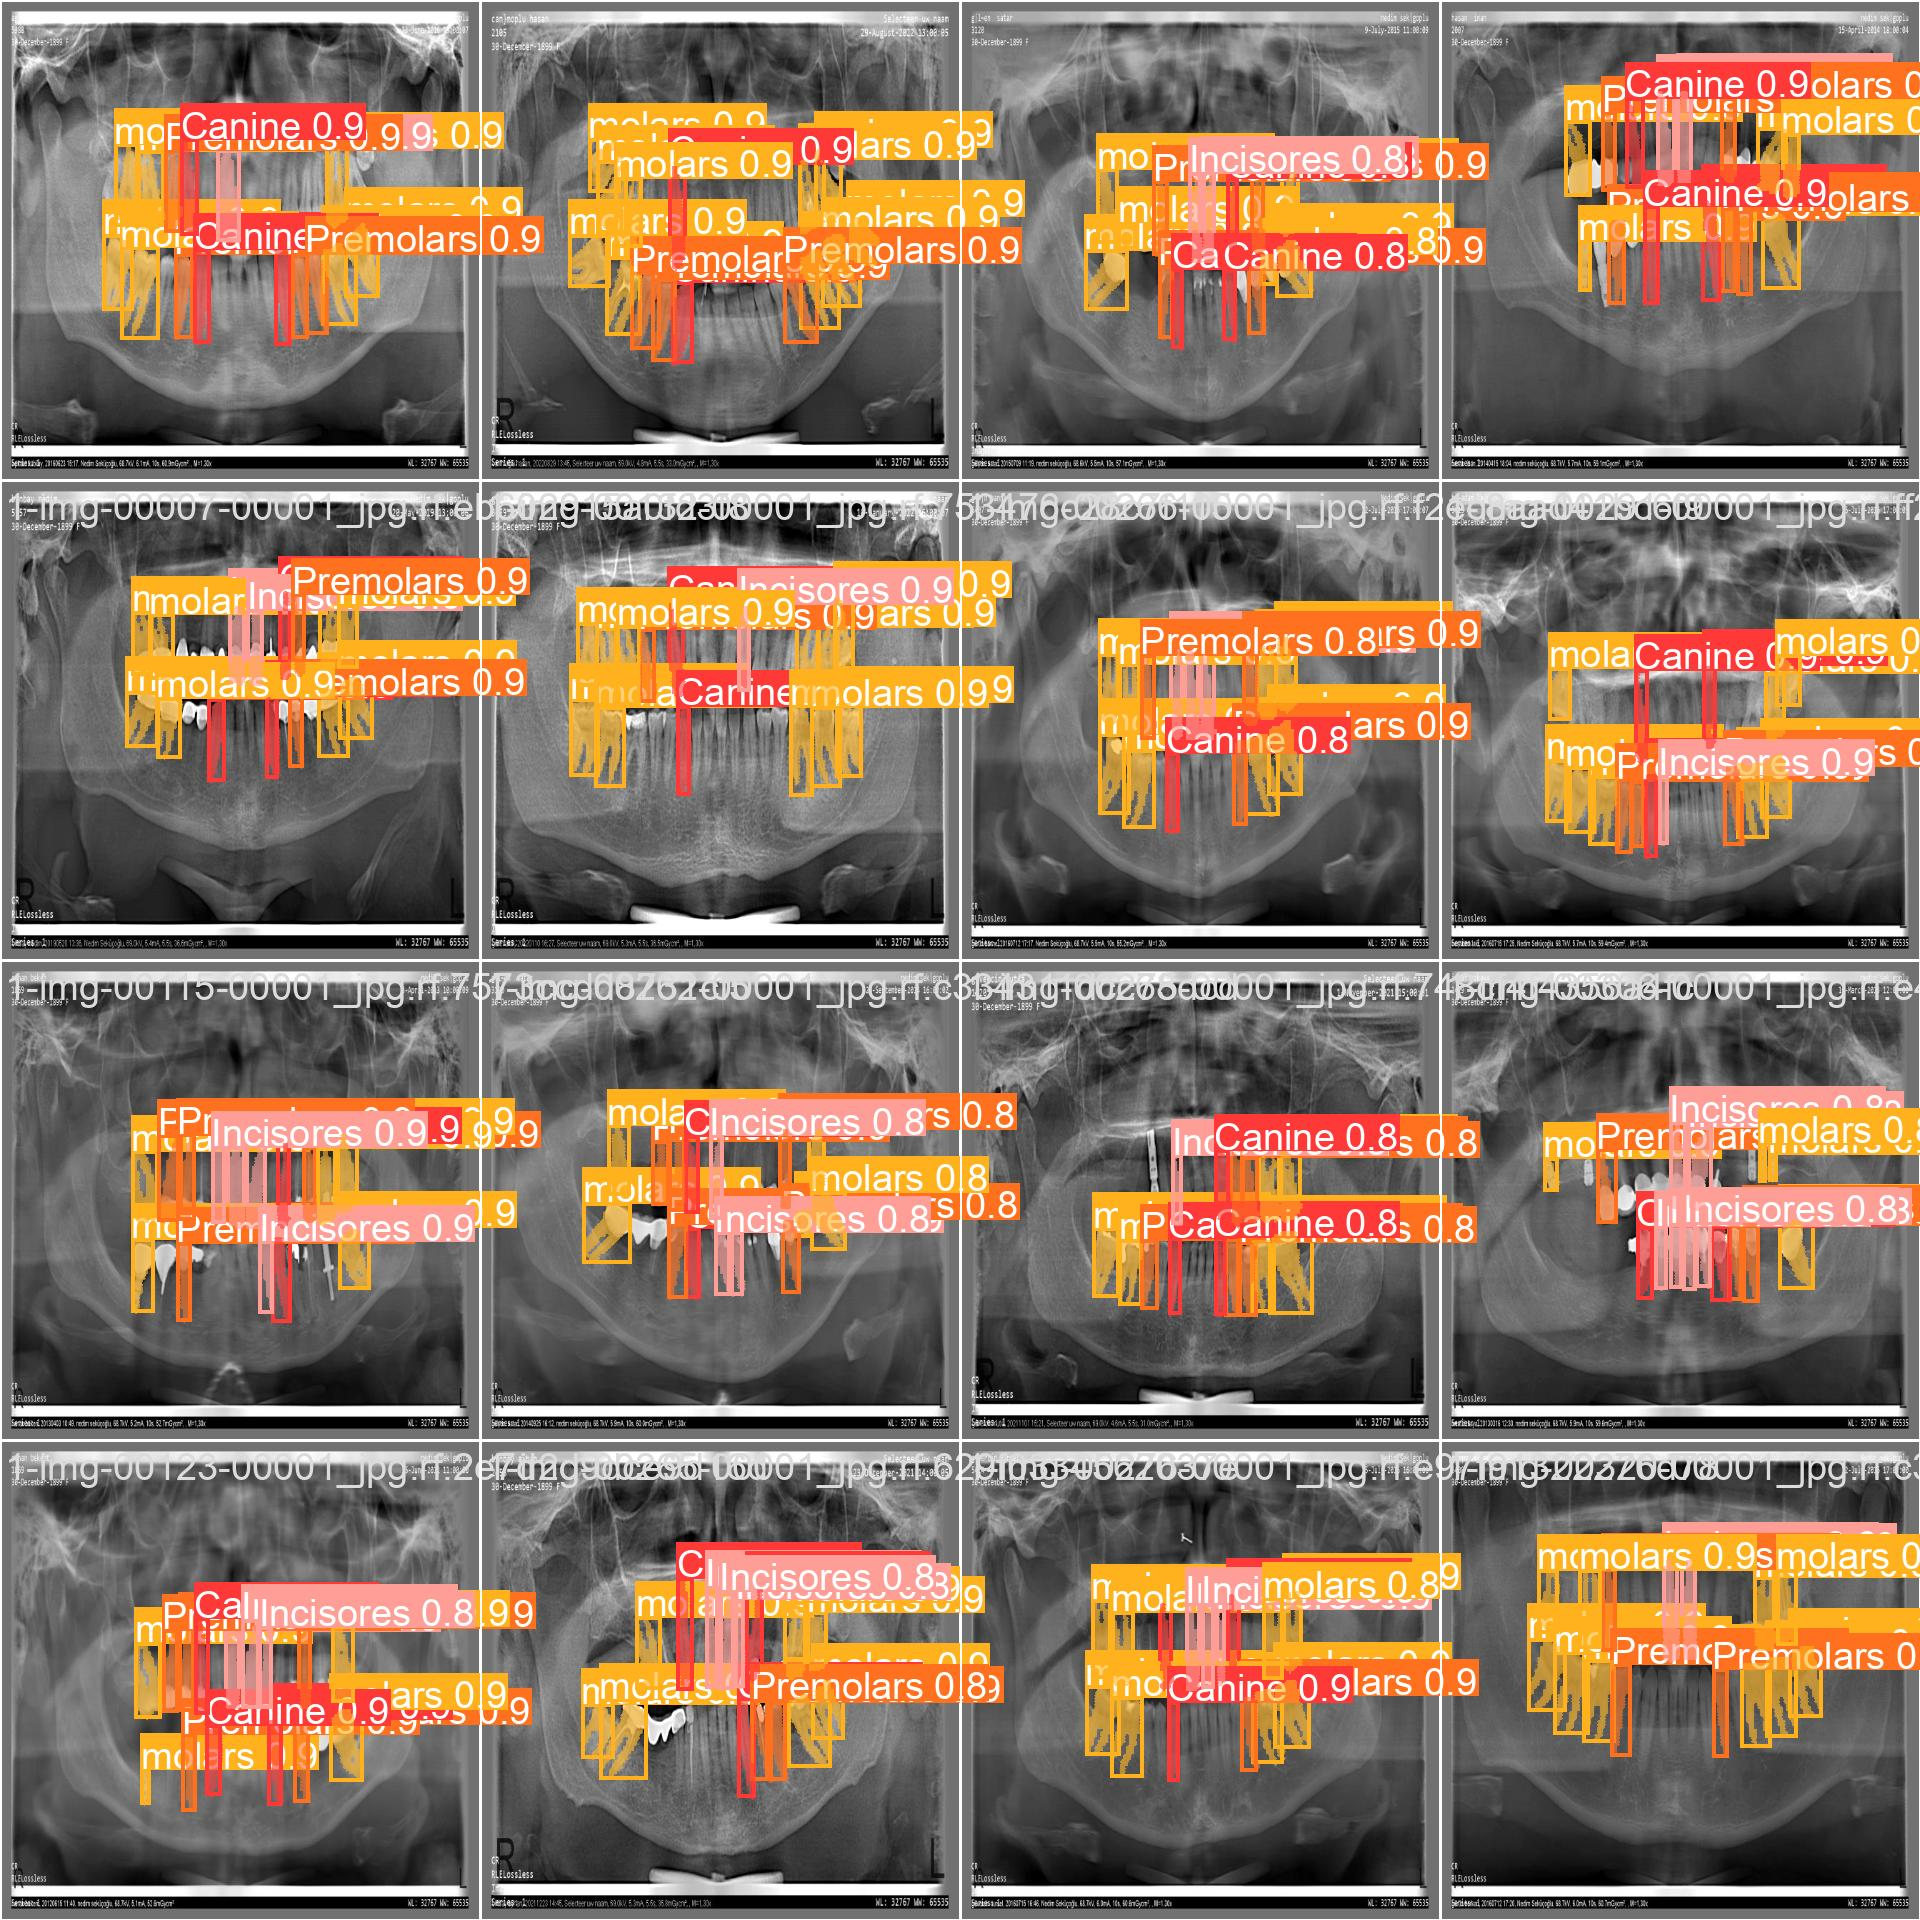

In [ ]:
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg')

In [ ]:
!yolo task=segment mode=val model='{HOME}/runs/segment/train3/weights/best.pt' data='data.yaml'

WARNING ⚠️ 'task=detection' conflicts with segment model /content/drive/MyDrive/dental_data/runs/segment/train3/weights/best.pt. Inheriting 'task=segment' from /content/drive/MyDrive/dental_data/runs/segment/train3/weights/best.pt and ignoring 'task=detection'.
2024-01-24 18:47:30.893502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 18:47:30.893551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 18:47:30.894770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 18:47:31.940473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cou

In [ ]:
!yolo task=segment mode=predict model='{HOME}/runs/segment/train2/weights/best.pt' conf=0.25 source='{HOME}/test/images' save=true

2024-01-22 18:11:58.405120: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 18:11:58.405194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 18:11:58.407071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 18:12:00.024840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/191 /content/dr

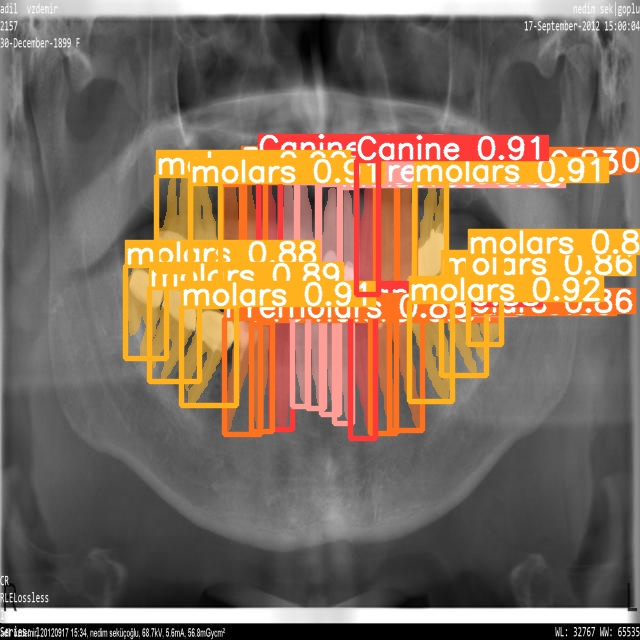

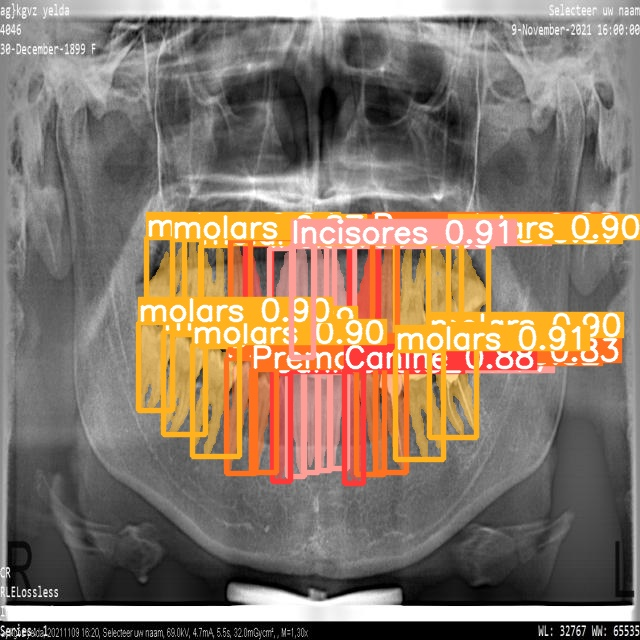

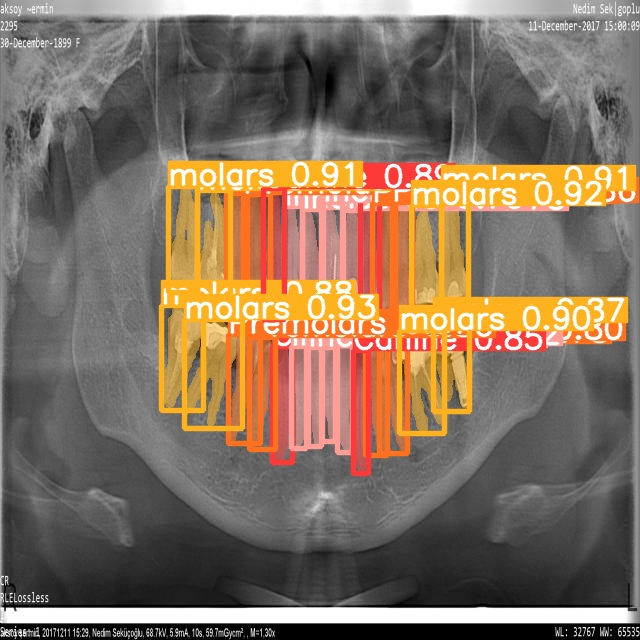

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!pip install google-colab

In [12]:
def predict_on_image(modelname, img, conf):
    model = YOLO(modelname)

    model.predict(img,conf=conf)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs

0: 640x640 4 Canines, 8 Incisoress, 8 Premolarss, 9 molarss, 45.8ms
Speed: 0.5ms pre-process, 45.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


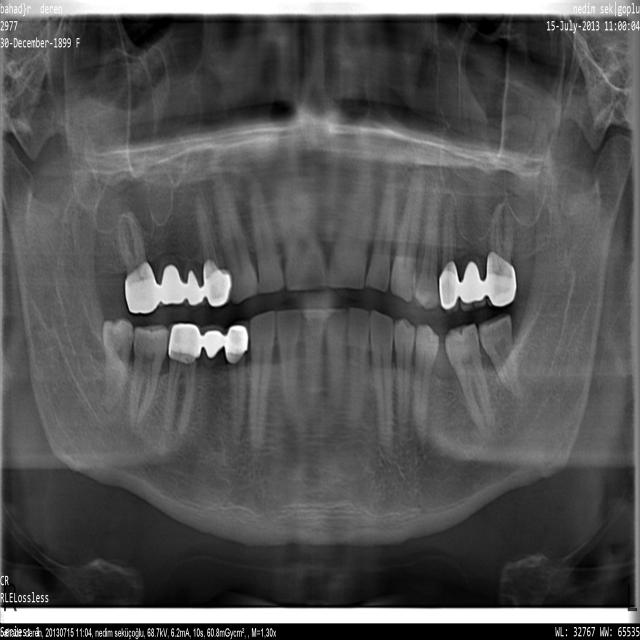

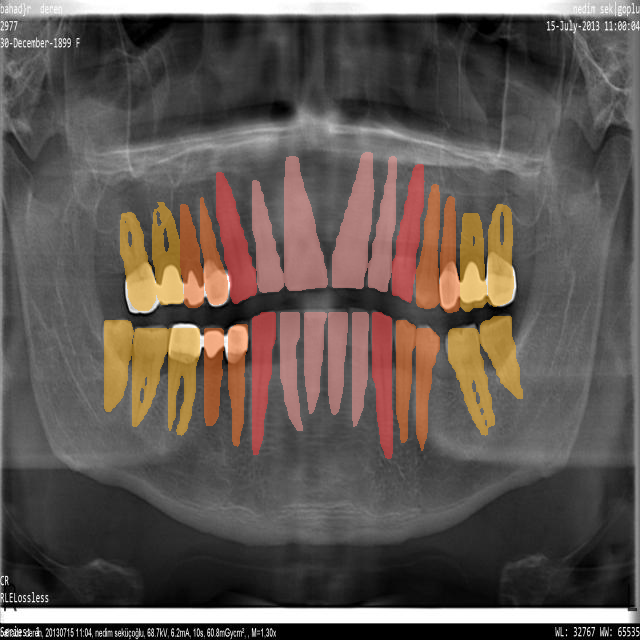

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

img = cv2.imread('/content/drive/MyDrive/dental_data/test/images/1-img-00078-00001_jpg.rf.2db9ca8e8013d4df893ba449952da771.jpg')
original =np.copy(img)
# predict by YOLOv8
modelname=f"{HOME}/runs/segment/train2/weights/best.pt"
predict_on_image(modelname, img, conf=0.35)

cv2_imshow(original)
cv2_imshow(img)


In [16]:
import glob
from IPython.display import Image, display
import cv2
from google.colab.patches import cv2_imshow
modelname=f"{HOME}/runs/segment/train2/weights/best.pt"

for image_path in glob.glob(f'{HOME}/test/images/*.jpg')[:10]:
  img = cv2.imread(image_path)
  predict_on_image(modelname, img, conf=0.35)
  cv2_imshow(img)




Output hidden; open in https://colab.research.google.com to view.